In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import image, ImageDataGenerator, img_to_array
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/UTK',
    validation_split = 0.2,
    subset = 'training',
    seed = 42,
    image_size = (200, 200),
    batch_size = 32,
    label_mode = 'binary'
)

Found 24106 files belonging to 2 classes.
Using 19285 files for training.


In [4]:
validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/UTK',
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = (200, 200),
    batch_size = 32,
    label_mode = 'binary'
)

Found 24106 files belonging to 2 classes.
Using 4821 files for validation.


In [5]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (32, 200, 200, 3)
배치 레이블 크기: (32, 1)


In [6]:
resnet = ResNet50(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # 출력층을 설계합니다.
model = Model(resnet.input, predictions)

94781440/94765736 [==============================] - 1s 0us/step


In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [8]:
history = model.fit_generator(
      train_generator,
      epochs = 10,
      steps_per_epoch = 100,
      validation_data = validation_generator,
      validation_steps = 100)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 342s 3s/step - loss: 0.4498 - acc: 0.8619 - val_loss: 0.2760 - val_acc: 0.8997
Epoch 2/10
100/100 [==============================] - 156s 2s/step - loss: 0.2532 - acc: 0.9091 - val_loss: 0.2373 - val_acc: 0.9144
Epoch 3/10
100/100 [==============================] - 154s 2s/step - loss: 0.2313 - acc: 0.9169 - val_loss: 0.2341 - val_acc: 0.9156
Epoch 4/10
100/100 [==============================] - 158s 2s/step - loss: 0.2352 - acc: 0.9134 - val_loss: 0.2095 - val_acc: 0.9191
Epoch 5/10
100/100 [==============================] - 150s 2s/step - loss: 0.2306 - acc: 0.9194 - val_loss: 0.2074 - val_acc: 0.9206
Epoch 6/10
100/100 [==============================] - 137s 1s/step - loss: 0.2325 - acc: 0.9162 - val_loss: 0.2026 - val_acc: 0.9278
Epoch 7/10
100/100 [==============================] - 23s 225ms/step - loss: 0.2211 - acc: 0.9059 - val_loss: 0.2065 - val_acc: 0.9269


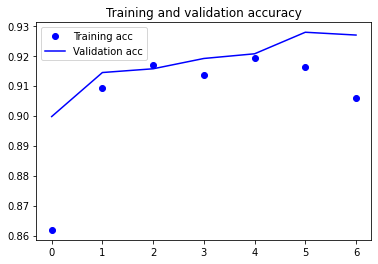

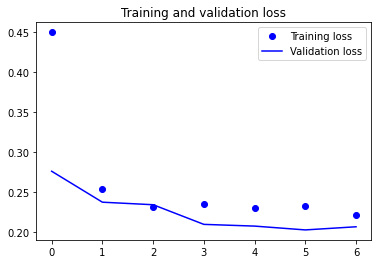

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from google.colab import files

In [20]:
uploaded=files.upload()

for fn in uploaded.keys():

  path ='/content/' + fn
  img = image.load_img(path, target_size=(200, 200))

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=32)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + '는 성인 사진입니다')
  else:
    print(fn + '는 미성년자 사진입니다')

Saving 60w.jpg to 60w.jpg
[0.9815554]
60w.jpg는 성인 사진입니다
